In [2]:
# MNIST 실습
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# MNIST 데이터셋 가져오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0           # 데이터 정규화
# MNIST 1) 학습데이터 : 60000개 2) 테스트 데이터 : 10000개

# 데이터셋을 섞고 배치 만들기
ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000)
train_size = int(len(x_train) * 0.7)                        # 학습셋 7 : 검증셋 3 비율
train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).batch(20)



11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# MNIST 분류 모델 구성
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 생성
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='sgd',
              metrics=['accuracy'])

In [4]:
# 모델 학습
hist = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
2100/2100 [==============================] - 2s 936us/step - loss: 0.8354 - accuracy: 0.7465 - val_loss: 0.3772 - val_accuracy: 0.8929
Epoch 2/10
2100/2100 [==============================] - 2s 869us/step - loss: 0.3424 - accuracy: 0.9009 - val_loss: 0.2969 - val_accuracy: 0.9144
Epoch 3/10
2100/2100 [==============================] - 2s 881us/step - loss: 0.2875 - accuracy: 0.9144 - val_loss: 0.2623 - val_accuracy: 0.9257
Epoch 4/10
2100/2100 [==============================] - 2s 924us/step - loss: 0.2577 - accuracy: 0.9245 - val_loss: 0.2349 - val_accuracy: 0.9330
Epoch 5/10
2100/2100 [==============================] - 2s 919us/step - loss: 0.2344 - accuracy: 0.9311 - val_loss: 0.2219 - val_accuracy: 0.9379
Epoch 6/10
2100/2100 [==============================] - 2s 862us/step - loss: 0.2185 - accuracy: 0.9361 - val_loss: 0.2145 - val_accuracy: 0.9408
Epoch 7/10
2100/2100 [==============================] - 2s 912us/step - loss: 0.2085 - accuracy: 0.9390 - val_loss: 0.2068 -

In [5]:
# 모델 평가
print("모델 평가")
model.evaluate(x_test, y_test)

모델 평가
313/313 [==============================] - 0s 627us/step - loss: 0.1958 - accuracy: 0.9429


[0.1958141177892685, 0.9429000020027161]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


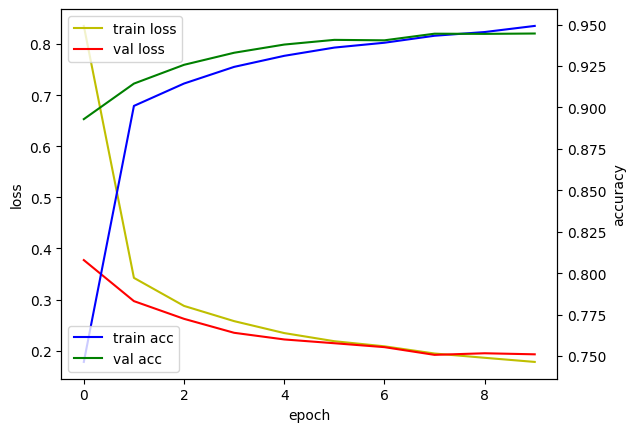

In [6]:
# 모델 정보 출력
model.summary()

# 모델 저장
model.save('mnist_model.h5')

# 학습 결과 그래프 그려보기
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()